<a href="https://colab.research.google.com/github/Suerine/ML_models/blob/main/dTree_Animals_Classificaitonipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [62]:
data = pd.read_csv("/content/animals.csv")

In [63]:
data

,Sr,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize,Class
0,1,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,2,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,3,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,4,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,5,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0,7
86,87,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1,4
87,88,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,1,2
88,89,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sr         90 non-null     int64
 1    Hair      90 non-null     int64
 2    Feathers  90 non-null     int64
 3    Eggs      90 non-null     int64
 4    Milk      90 non-null     int64
 5    Airborne  90 non-null     int64
 6    Aquatic   90 non-null     int64
 7    Predator  90 non-null     int64
 8    Teeth     90 non-null     int64
 9    Backbone  90 non-null     int64
 10   Breathes  90 non-null     int64
 11   Venemous  90 non-null     int64
 12   Fins      90 non-null     int64
 13   Legs      90 non-null     int64
 14   Tails     90 non-null     int64
 15   Domestic  90 non-null     int64
 16   Catsize   90 non-null     int64
 17  Class      90 non-null     int64
dtypes: int64(18)
memory usage: 12.8 KB


In [65]:
data['Class'] = data['Class'].replace([1], 'mammals')

In [66]:
data.head(10)

,Sr,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize,Class
0,1,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,mammals
1,2,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,mammals
2,3,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,4,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,mammals
4,5,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,mammals
5,6,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,mammals
6,7,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,mammals
7,8,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,9,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,10,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,mammals


In [67]:
data['Class'] = data['Class'].replace([2,3,4,5,6,7,8], 'non-mammals')

In [68]:
data.head(10)

,Sr,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize,Class
0,1,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,mammals
1,2,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,mammals
2,3,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,non-mammals
3,4,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,mammals
4,5,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,mammals
5,6,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,mammals
6,7,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,mammals
7,8,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,non-mammals
8,9,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,non-mammals
9,10,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,mammals


In [75]:
pd.crosstab([data[' Eggs'], data[' Milk']], data['Class'])

Class        mammals  non-mammals
 Eggs  Milk                      
0     0            0            2
      1           36            0
1     0            0           51
      1            1            0

In [76]:
from sklearn import tree

In [77]:
y = data['Class']

In [78]:
y

0         mammals
1         mammals
2     non-mammals
3         mammals
4         mammals
         ...     
85    non-mammals
86    non-mammals
87    non-mammals
88    non-mammals
89    non-mammals
Name: Class, Length: 90, dtype: object

In [84]:
X=data.drop(['Sr', 'Class'], axis=1)

In [85]:
X

,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0
86,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1
87,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,1
88,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0


In [86]:
clf=tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [87]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [88]:
clf=clf.fit(X,y)

In [89]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [90]:
import pydotplus

In [91]:
from IPython.display import Image

In [92]:
dot_data = tree.export_graphviz(clf, feature_names=X.columns,
                              class_names=['mammals','non-mammals'],
                              filled=True, out_file=None)

In [93]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label=" Milk <= 0.5\\nentropy = 0.977\\nsamples = 90\\nvalue = [37, 53]\\nclass = non-mammals", fillcolor="#c3e1f7"] ;\n1 [label="entropy = 0.0\\nsamples = 53\\nvalue = [0, 53]\\nclass = non-mammals", fillcolor="#399de5"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="entropy = 0.0\\nsamples = 37\\nvalue = [37, 0]\\nclass = mammals", fillcolor="#e58139"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n}'

In [94]:
graph=pydotplus.graph_from_dot_data(dot_data)

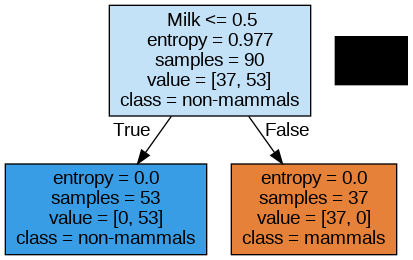

In [95]:
graph

Image(graph.create_png())

In [104]:
testData=[[91,0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 'mammals'],
          [92,0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0, 'non-mammals'],
          [93,0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 'non-mammals'],
          [94,1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 'mammals'],
          [95,0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 4, 1, 0, 0, 'non-mammals']]

In [105]:
testData

[[91, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 'mammals'],
 [92, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0, 'non-mammals'],
 [93, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 'non-mammals'],
 [94, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 'mammals'],
 [95, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 4, 1, 0, 0, 'non-mammals']]

In [106]:
data.columns

Index(['Sr', ' Hair', ' Feathers', ' Eggs', ' Milk', ' Airborne', ' Aquatic',
       ' Predator', ' Teeth', ' Backbone', ' Breathes', ' Venemous', ' Fins',
       ' Legs', ' Tails', ' Domestic', ' Catsize', 'Class'],
      dtype='object')

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sr         90 non-null     int64 
 1    Hair      90 non-null     int64 
 2    Feathers  90 non-null     int64 
 3    Eggs      90 non-null     int64 
 4    Milk      90 non-null     int64 
 5    Airborne  90 non-null     int64 
 6    Aquatic   90 non-null     int64 
 7    Predator  90 non-null     int64 
 8    Teeth     90 non-null     int64 
 9    Backbone  90 non-null     int64 
 10   Breathes  90 non-null     int64 
 11   Venemous  90 non-null     int64 
 12   Fins      90 non-null     int64 
 13   Legs      90 non-null     int64 
 14   Tails     90 non-null     int64 
 15   Domestic  90 non-null     int64 
 16   Catsize   90 non-null     int64 
 17  Class      90 non-null     object
dtypes: int64(17), object(1)
memory usage: 12.8+ KB


In [107]:
testData=pd.DataFrame(testData, columns=data.columns)


In [108]:
testData

,Sr,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize,Class
0,91,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,0,mammals
1,92,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,non-mammals
2,93,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,non-mammals
3,94,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,0,mammals
4,95,0,0,1,0,0,1,0,0,1,1,0,0,4,1,0,0,non-mammals


In [109]:
testY=testData['Class']

In [110]:
testY

0        mammals
1    non-mammals
2    non-mammals
3        mammals
4    non-mammals
Name: Class, dtype: object

In [112]:
testX=testData.drop(['Sr','Class'], axis=1)

In [113]:
testX

,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize
0,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,0
1,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,0
4,0,0,1,0,0,1,0,0,1,1,0,0,4,1,0,0


In [114]:
predY=clf.predict(testX)

In [115]:
predY

array(['mammals', 'non-mammals', 'non-mammals', 'mammals', 'non-mammals'],
      dtype=object)

In [116]:
testY

0        mammals
1    non-mammals
2    non-mammals
3        mammals
4    non-mammals
Name: Class, dtype: object

In [117]:
predictions=pd.concat([testData['Sr'], testData['Class'], pd.Series(predY, name='Predicted Class')], axis=1)

In [118]:
predictions

,Sr,Class,Predicted Class
0,91,mammals,mammals
1,92,non-mammals,non-mammals
2,93,non-mammals,non-mammals
3,94,mammals,mammals
4,95,non-mammals,non-mammals


In [119]:
from sklearn.metrics import accuracy_score

In [120]:
accuracy_score(testY, predY)

1.0

In [121]:
print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

Accuracy on test data is 1.00


In [122]:
import numpy as np

In [123]:
import matplotlib.pyplot as plt

In [124]:
from numpy.random import random

In [125]:
%matplotlib inline

In [126]:
N = 1500

In [127]:
mean1=[6,14]

In [128]:
mean2=[10,6]

In [129]:
mean3=[14,14]

In [130]:
cov=[[3.5,0],[0,3.5]]

In [131]:
np.random.seed(50)

In [132]:
X=np.random.multivariate_normal(mean1, cov, int(N/6))

In [133]:
X.shape

(250, 2)

In [135]:
X=np.concatenate((X, np.random.multivariate_normal(mean2, cov, int(N/6))))

In [136]:
X.shape

(500, 2)

In [137]:
X=np.concatenate((X, np.random.multivariate_normal(mean3, cov, int(N/6))))

In [138]:
X.shape

(750, 2)

In [139]:
X=np.concatenate((X,20*np.random.rand(int(N/2),2)))

In [140]:
X.shape

(1500, 2)

In [141]:
X[0]

array([ 3.0808485 , 13.94204621])

In [142]:
y=np.concatenate((np.ones(int(N/2)), np.zeros(int(N/2))))

In [143]:
X.shape

(1500, 2)

In [144]:
y

array([1., 1., 1., ..., 0., 0., 0.])

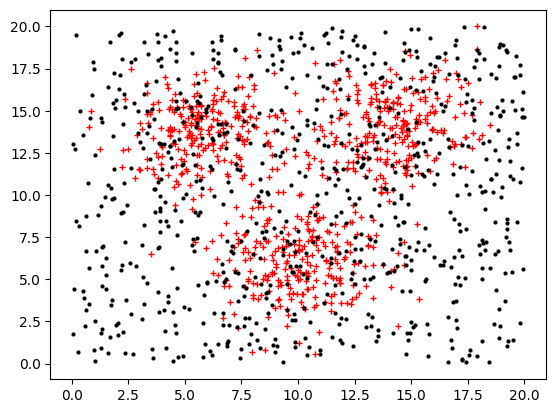

In [145]:
plt.plot(X[:int(N/2),0],X[: int(N/2),1],'r+',X[int(N/2):,0],X[int(N/2):,1],'k.',ms=4)

In [146]:
maxDepths=[2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

In [147]:
len(maxDepths)

17

In [148]:
import numpy as np

In [149]:
trainAcc=np.zeros(len(maxDepths))

In [150]:
trainAcc

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [151]:
testAcc=np.zeros(len(maxDepths))

In [152]:
testAcc

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
from sklearn.metrics import accuracy_score

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [156]:
from sklearn import tree

In [157]:
index = 0
for depth in maxDepths:
    clf=tree.DecisionTreeClassifier(max_depth=depth)
    clf=clf.fit(X_train, y_train)
    Y_predTrain=clf.predict(X_train)
    Y_predTest=clf.predict(X_test)
    trainAcc[index]=accuracy_score(y_train, Y_predTrain)#training data
    testAcc[index]=accuracy_score(y_test, Y_predTest)#test data
    index+=1

In [158]:
trainAcc

array([0.64416667, 0.68583333, 0.72416667, 0.72666667, 0.755     ,
       0.78      , 0.79      , 0.81583333, 0.83416667, 0.91166667,
       0.96833333, 0.99416667, 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [159]:
testAcc

array([0.59666667, 0.65      , 0.69666667, 0.69666667, 0.72333333,
       0.72      , 0.72      , 0.71333333, 0.71333333, 0.72666667,
       0.71      , 0.68      , 0.67666667, 0.67666667, 0.67666667,
       0.68666667, 0.68      ])

In [160]:
import matplotlib.pyplot as plt

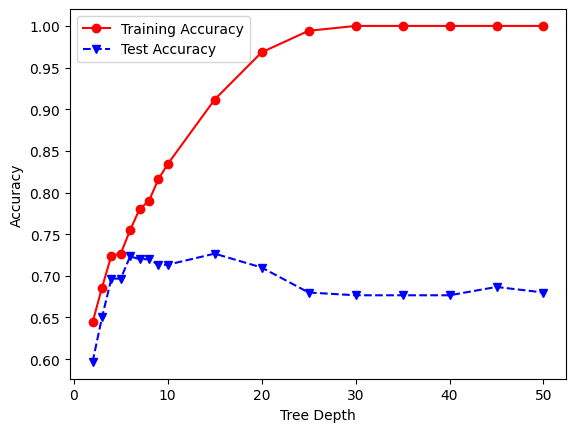

In [161]:
plt.plot(maxDepths, trainAcc, 'ro-', maxDepths, testAcc, 'bv--')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.show()

In [162]:
testAcc.max()

0.7266666666666667